This analysis uses the Python programming language and a Google Colab hosted runtime. The popular libraries *scikit-learn*, *seaborn*, and *pandas* are also used.

In [1]:
!python -V

!pip install -U scikit-learn > true
import sklearn
print("scikit-learn", sklearn.__version__)

!pip install -U seaborn > true
import seaborn
print("seaborn", seaborn.__version__)

import pandas
print("pandas", pandas.__version__)

Python 3.10.12
scikit-learn 1.5.2
seaborn 0.13.2
pandas 2.1.4


The data for this analysis comes from the "Superintendent Salary Report by District for School Year 2023-2024"; this is a public dataset released by the Texas Education Agency, and is available online: https://data.texas.gov/dataset/Superintendent-Salary-Report-by-District-for-Schoo/6dh5-cse4.

In [2]:
data = pandas.read_json("https://data.texas.gov/resource/6dh5-cse4.json")
data

,state,region,county,district,district_name,charter_status,superintendent,base_pay,fte_pay,enrollment,fte
0,TX,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,"CAGER, SHENIKWA M",111720,111720.0,778,1.0
1,TX,10,DALLAS COUNTY,57829,A+ ACADEMY,OPEN ENROLLMENT CHARTER,"WHITE, BRENTON P",122020,244040.0,1649,0.5
2,TX,4,HARRIS COUNTY,101871,A+ UNLIMITED POTENTIAL,OPEN ENROLLMENT CHARTER,"CASTRO, PAUL DAVID",165468,165468.0,150,1.0
3,TX,12,HILL COUNTY,109901,ABBOTT ISD,TRADITIONAL ISD/CSD,"PUSTEJOVSKY, ERIC D",116133,116133.0,284,1.0
4,TX,17,HALE COUNTY,95901,ABERNATHY ISD,TRADITIONAL ISD/CSD,"WALDRIP, AARON MARK",140190,140190.0,812,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,TX,14,COMANCHE COUNTY,47905,SIDNEY ISD,TRADITIONAL ISD/CSD,"RUCKER, JAMES EDWIN",45000,90000.0,152,0.5
996,TX,19,HUDSPETH COUNTY,115902,SIERRA BLANCA ISD,TRADITIONAL ISD/CSD,"MCGRAW, R LEEANN",100680,100680.0,99,1.0
997,TX,5,HARDIN COUNTY,100904,SILSBEE ISD,TRADITIONAL ISD/CSD,"WEISS, GREGORY WAYNE",177124,177124.0,2654,1.0
998,TX,16,BRISCOE COUNTY,23902,SILVERTON ISD,TRADITIONAL ISD/CSD,"FRANCIS, MICHELLE R",96658,96658.0,223,1.0


The present work compares the performance of three Support Vector Machine algorithms implemented as classes in *scikit-learn*: SVC, NuSVC, and LinearSVC. Binary classification is performed with "charter_status" serving as the labels and "base_pay" and "enrollment" serving as input features. The goal of this analysis is to understand what kinds of patterns are seen between superintendents' salaries and the enrollment at their school districts, both at independent school districts and at open enrollment charter school districts.

First, a scatterplot of the the two input features is generated to understand the distribution of the labeled data.

<Axes: xlabel='base_pay', ylabel='enrollment'>

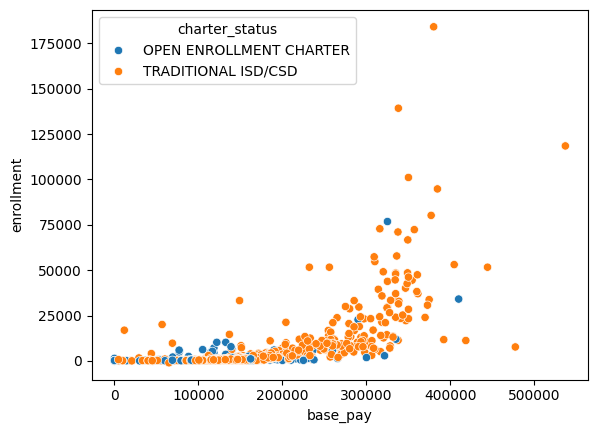

In [3]:
seaborn.scatterplot(data=data, x="base_pay", y="enrollment", hue="charter_status")